In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
C:\Users\Acer\.conda\envs\senv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Acer\.conda\envs\senv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Acer\.conda\envs\senv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Acer\.conda\envs\senv\lib\site-packages\tensorflow\py

In [2]:
df0=pd.read_csv('Data1/gases.csv')
df0.head()

keras.__version__

df1=pd.read_csv('Data1/gases_mompean_1.csv', )
print(df1.head())
df2=pd.read_csv('Data1/gases_mompean_2.csv', )
print(df2.head())
df3=pd.read_csv('Data1/gases_mompean_3.csv', )
print(df3.head())
df4 = pd.read_csv('Data1/test.csv', )

df = pd.concat([df0,df1, df2,df3,df4], axis=0)

df.head(10)

   SO2_ae  SO2_we  NO2_ae  NO2_we  CO_ae  CO_we  O3_we  O3_ae  SO2_Mompean  \
0     347     351     223     213    372    444    233    219            7   
1     348     354     225     209    384    442    226    222            8   
2     349     356     222     207    375    435    225    219            8   
3     349     355     222     211    369    444    228    218            9   
4     349     353     222     217    368    462    233    218            7   

   NO2_Mompean  CO_Mompean  O3_Mompean  Temperatura  Humedad  
0            2         0.3          74         33.8     47.0  
1            2         0.3          75         37.5     39.3  
2            2         0.3          72         38.9     37.0  
3            2         0.3          70         38.4     37.7  
4            2         0.3          66         36.7     42.5  
   SO2_ae  SO2_we  NO2_ae  NO2_we  CO_ae  CO_we  O3_we  O3_ae  SO2_Mompean  \
0     358     389     229     242    331    484    225    224            3 

,Day,Time,NO2_we,NO2_ae,Sensibilidad_NO2,ppb_NO2,O3_we,O3_ae,Sensibilidad_O3,ppb_03,...,Temperatura,Humedad,ug/m3_NO2_Sensor,ug/m3_O3_Sensor,ug/m3_SO2_Sensor,ug/m3_CO_Sensor,NO2_Mompean,CO_Mompean,O3_Mompean,SO2_Mompean
0,'5/5/21','10:00',231.897985,227.435182,0.261,17.098862,234.081870,227.570459,0.35,18.604034,...,26.1,50.8,32.036099,36.367296,228.034624,95.964213,16,0.3,53,9
1,'5/5/21','11:00',231.119590,228.038433,0.261,11.805201,237.919148,228.696986,0.35,26.349033,...,26.9,49.5,22.059026,51.369944,227.053463,121.318015,12,0.2,64,8
2,'5/5/21','12:00',229.071089,229.268249,0.261,-0.755400,233.436220,227.519084,0.35,16.906103,...,30.3,42.3,-1.395713,32.590754,231.330373,64.333234,13,0.2,61,7
3,'5/5/21','13:00',227.583855,227.728481,0.261,-0.554122,234.630719,225.650348,0.35,25.658205,...,30.6,41.4,-1.022811,49.413776,247.802624,73.346056,12,0.2,63,5
4,'5/5/21','14:00',227.624575,227.931468,0.261,-1.175838,234.066116,225.371827,0.35,24.840824,...,32.4,38.6,-2.157604,47.557800,265.794803,65.830052,18,0.2,53,6
5,'5/5/21','15:00',227.291782,226.489937,0.261,3.072201,235.852504,224.863073,0.35,31.398374,...,31.8,39.0,5.648427,60.230514,288.119904,123.737886,15,0.2,60,6
6,'5/5/21','16:00',228.399202,225.874952,0.261,9.671459,238.484111,224.930848,0.35,38.723607,...,30.7,41.3,17.845935,74.551196,297.104749,150.538236,13,0.2,67,6
7,'5/5/21','17:00',230.491785,225.486709,0.261,19.176538,240.992237,225.651070,0.35,43.831907,...,28.9,44.9,35.595732,84.888639,286.584407,175.339188,12,0.2,68,6
8,'5/5/21','18:00',231.775710,224.165945,0.261,29.156186,244.100372,226.366972,0.35,50.666858,...,26.1,51.4,54.626467,99.043930,263.390381,190.264520,12,0.2,69,6
9,'5/5/21','19:00',235.820826,224.190143,0.261,44.562005,247.830627,228.368969,0.35,55.604739,...,21.6,62.9,84.765177,110.356022,228.852071,210.557072,11,0.2,70,6


In [3]:
training_data, testing_data = train_test_split(df, test_size=0.1, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

X_train = training_data[['NO2_we','NO2_ae','Temperatura','Humedad']].values
# X = df.drop(columns=['SalePrice'])
Y_train = training_data[['NO2_Mompean']].values
X_test = testing_data[['NO2_we','NO2_ae','Temperatura','Humedad']]
Y_test = testing_data[['NO2_Mompean']]

No. of training examples: 498
No. of testing examples: 56


In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(4, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))

model.add(keras.layers.Dense(1,,activation='sigmoid')
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test,Y_test))

model.summary()


Instructions for updating:
Use tf.cast instead.
Train on 498 samples, validate on 56 samples
Epoch 1/30
498/498 [==============================] - 0s 300us/step - loss: -238.3220 - accuracy: 0.0060 - val_loss: -241.9827 - val_accuracy: 0.0000e+00
Epoch 2/30
498/498 [==============================] - 0s 22us/step - loss: -270.3803 - accuracy: 0.0000e+00 - val_loss: -241.9827 - val_accuracy: 0.0000e+00
Epoch 3/30
498/498 [==============================] - 0s 18us/step - loss: -270.3803 - accuracy: 0.0000e+00 - val_loss: -241.9827 - val_accuracy: 0.0000e+00
Epoch 4/30
498/498 [==============================] - 0s 22us/step - loss: -270.3803 - accuracy: 0.0000e+00 - val_loss: -241.9827 - val_accuracy: 0.0000e+00
Epoch 5/30
498/498 [==============================] - 0s 22us/step - loss: -270.3803 - accuracy: 0.0000e+00 - val_loss: -241.9827 - val_accuracy: 0.0000e+00
Epoch 6/30
498/498 [==============================] - 0s 20us/step - loss: -270.3803 - accuracy: 0.0000e+00 - val_loss: -241.

In [ ]:
y_pred = model.predict(X_test)
#print(y_pred)

test_data1 = np.array([231.119590, 228.038433,26.1,50.8]) #12
test_data2 = np.array([227.624575, 227.931468,32.4,38.6]) #18
print(model.predict(test_data1.reshape(1,4), batch_size=1))
print(model.predict(test_data2.reshape(1,4), batch_size=1))

print(history.history.keys())

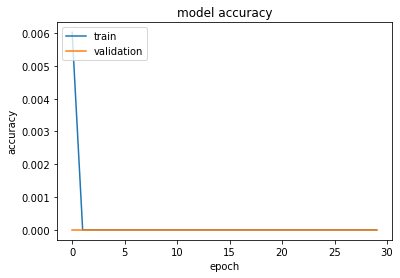

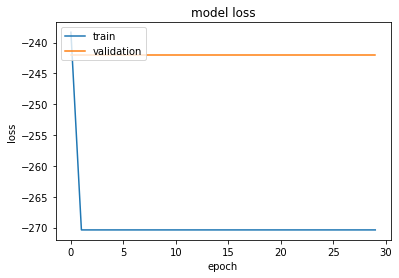

In [6]:
# #  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
# output = model.predict(X)
# print(output)

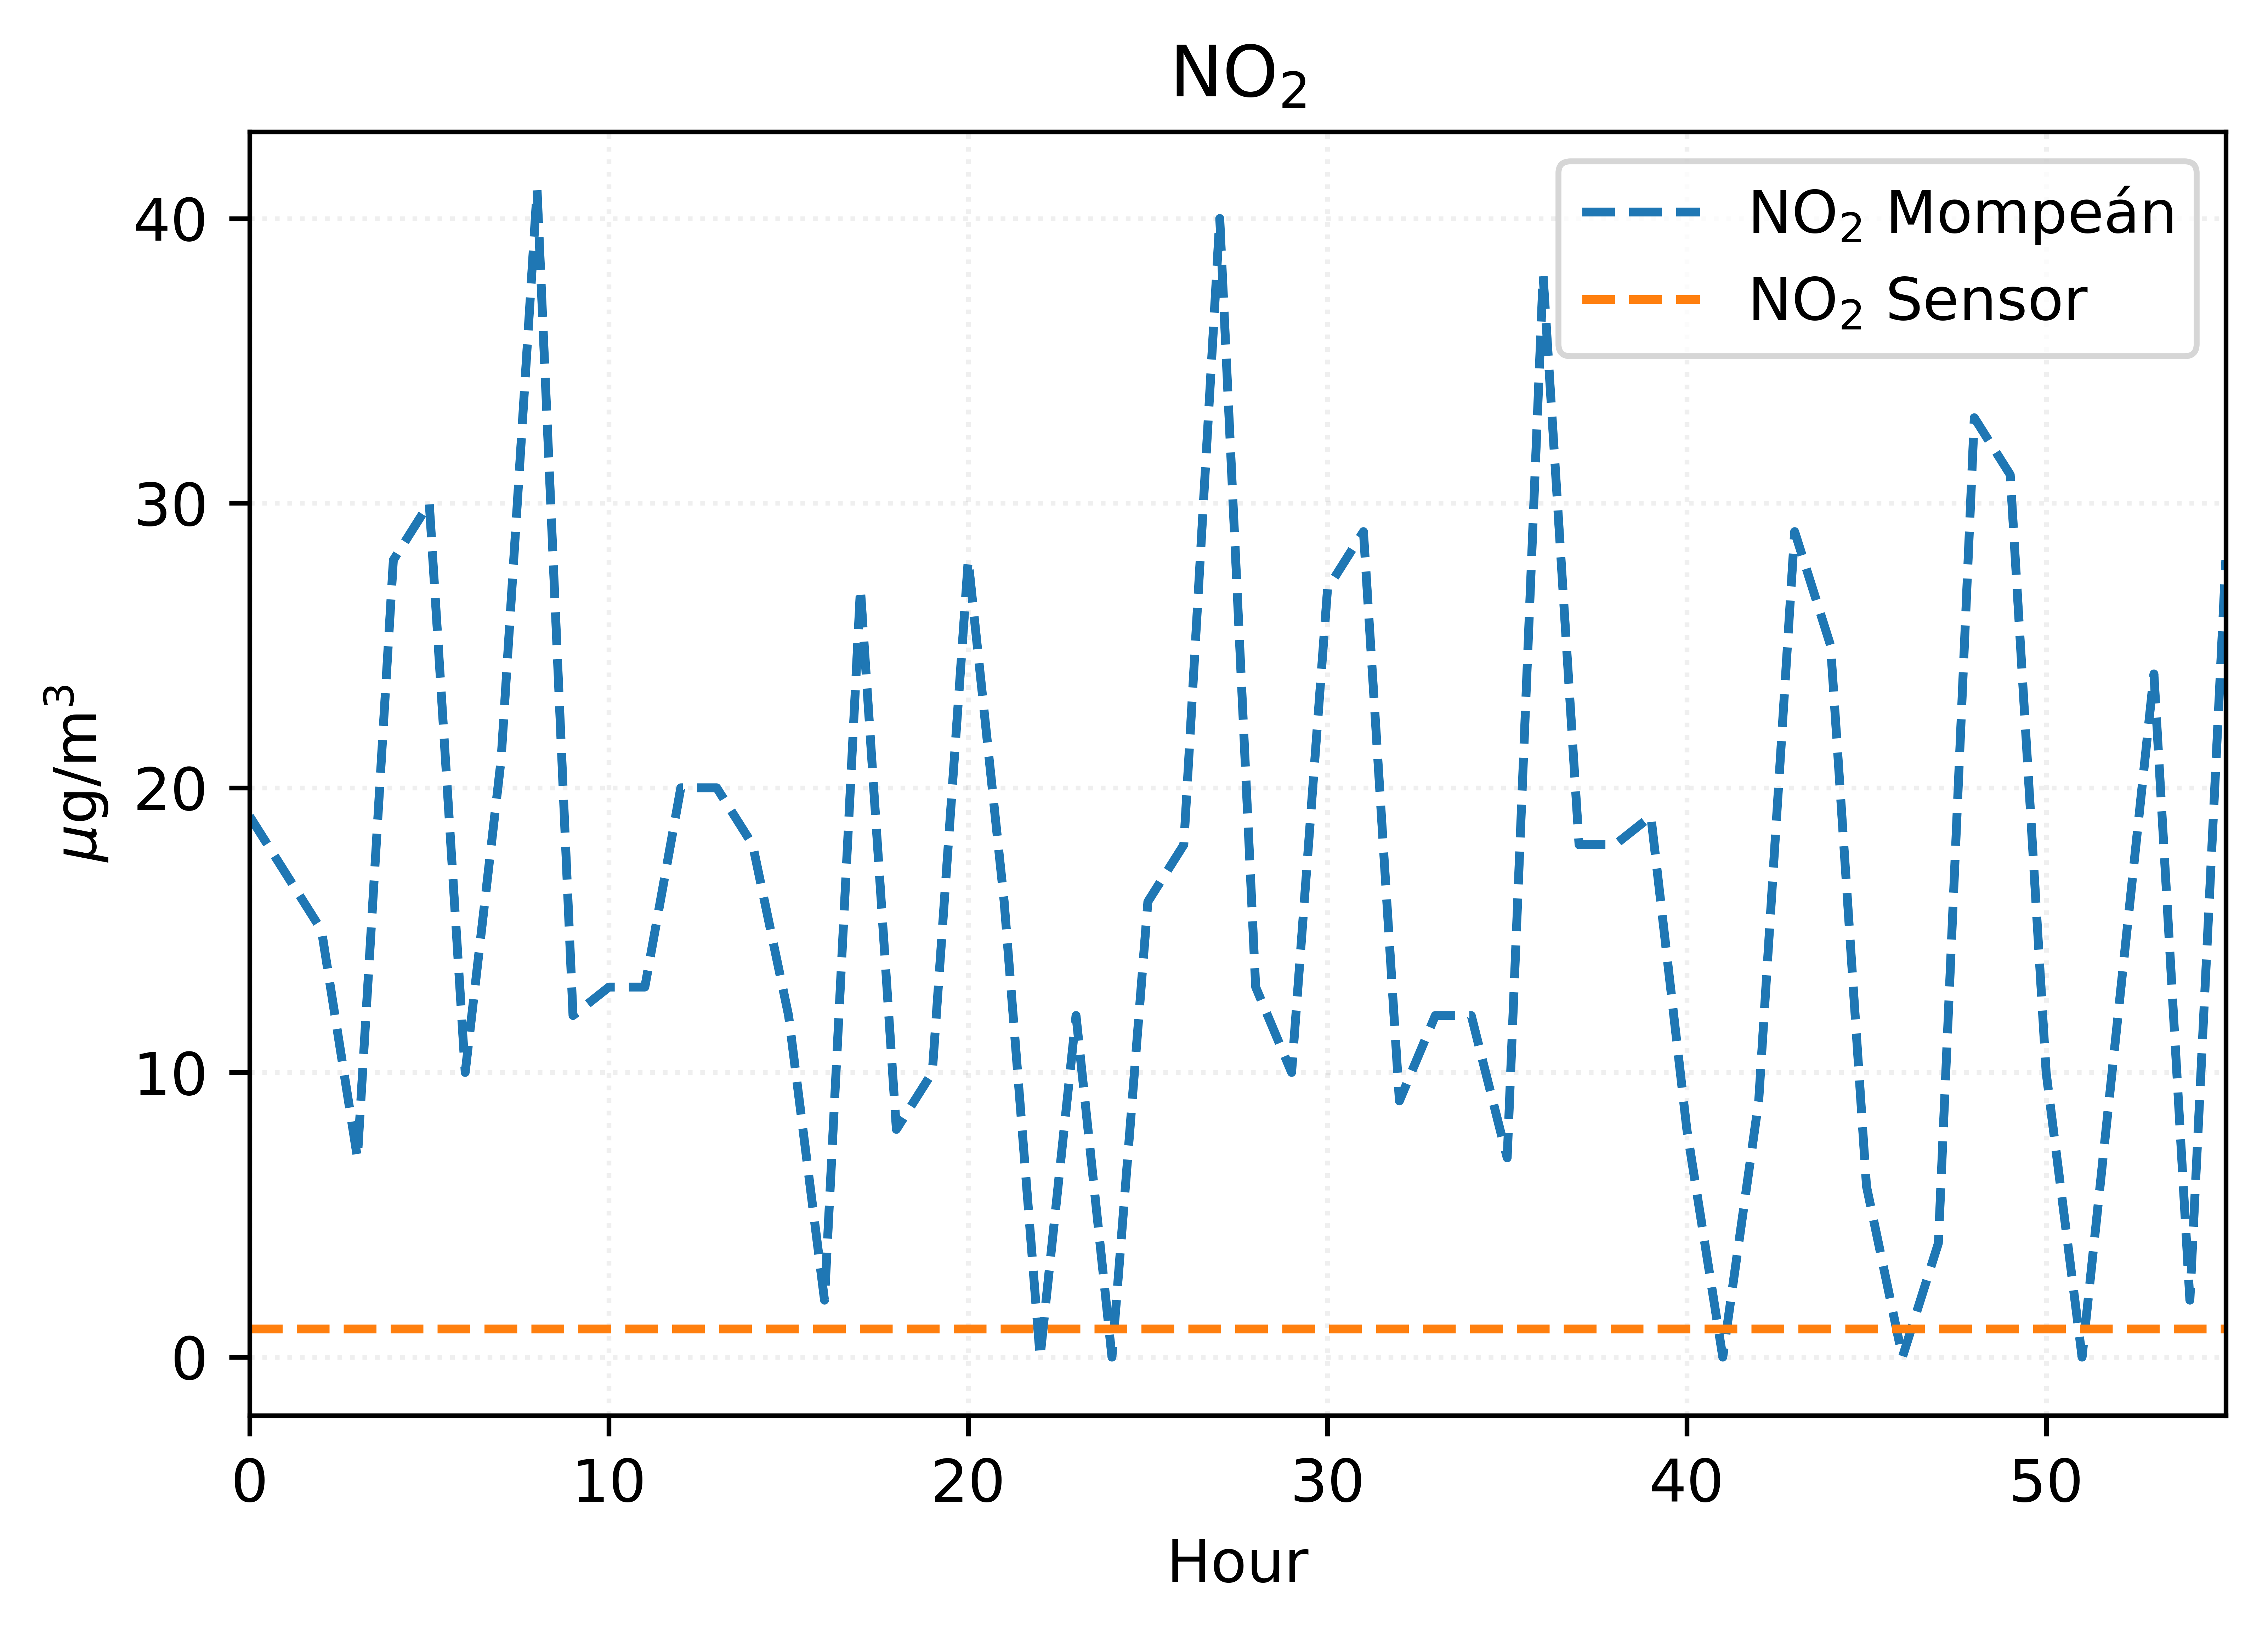

In [7]:
def plotting(X,Y,model):    
    fig = plt.figure(figsize=(6, 4), dpi = 1200)

    ax = fig.gca()
    ax.plot(range(0, len(Y)), Y, label=r'NO$_{2}$ Mompeán', ls='--')
    ax.plot(range(0, len(X)), model.predict(X), label=r'NO$_{2}$ Sensor', ls='--')

    ax.set_xlim(0, len(Y)-1)

    ax.set_xlabel(r'Hour')
    ax.set_ylabel(r'$\mu$g/m$^3$')
    ax.set_title(r'NO$_2$')

    ax.grid(ls='dotted', alpha=0.2)
    ax.legend()

    plt.show()
    
plotting(X_test,Y_test,model)
# old_model = keras.models.load_model('NO2.h5')
# plotting(X_test,Y_test,old_model)


In [ ]:


# model.save('NO2.h5')
# old_model = keras.models.load_model('saved_model.h5')

# test_data = np.array([2003,854,1710,2,1,3,8,2008])
# print(old_model.predict(test_data.reshape(1,8), batch_size=1))




In [ ]:
# Without temperature and humidity

X_train = training_data[['NO2_we','NO2_ae']]
# X = df.drop(columns=['SalePrice'])
Y_train = training_data[['NO2_Mompean']]
X_test = testing_data[['NO2_we','NO2_ae']]
Y_test = testing_data[['NO2_Mompean']]

In [ ]:
#defining model
model = keras.models.Sequential()

model.add(keras.layers.Dense(2, activation='relu', input_shape=(2,)))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(2, activation='relu'))

model.add(keras.layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy'])


In [ ]:
#training 
history = model.fit(X_train, Y_train, epochs=50, validation_data = (X_test,Y_test))
print(model.summary())

In [ ]:
test_data1 = np.array([231.119590, 228.038433])
test_data2 = np.array([227.624575, 227.931468])
print(model.predict(test_data1.reshape(1,2), batch_size=1))
print(model.predict(test_data2.reshape(1,2), batch_size=1))


print(history.history.keys())

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

output = model.predict(X_train)
print(output)

# SO2

In [ ]:
X_train = training_data[['SO2_we','SO2_ae','Temperatura','Humedad']].values
# X = df.drop(columns=['SalePrice'])
Y_train = training_data[['SO2_Mompean']].values
X_test = testing_data[['SO2_we','SO2_ae','Temperatura','Humedad']]
Y_test = testing_data[['SO2_Mompean']]

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(4, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))


model.add(keras.layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test,Y_test))

In [ ]:
model.save('SO2.h5')
def plotting(X,Y,model):    
    fig = plt.figure(figsize=(6, 4), dpi = 1200)

    ax = fig.gca()
    ax.plot(range(0, len(Y)), Y, label=r'SO$_{2}$ Mompeán', ls='--')
    ax.plot(range(0, len(X)), model.predict(X), label=r'SO$_{2}$ Sensor', ls='--')

    ax.set_xlim(0, len(Y)-1)
    
    ax.set_xlabel(r'Hour')
    ax.set_ylabel(r'$\mu$g/m$^3$')
    ax.set_title(r'SO$_2$')

    ax.grid(ls='dotted', alpha=0.2)
    ax.legend()

    plt.show()
    
plotting(X_test,Y_test,model)


# CO

In [ ]:
X_train = training_data[['CO_we','CO_ae','Temperatura','Humedad']].values
# X = df.drop(columns=['SalePrice'])
Y_train = training_data[['CO_Mompean']].values
X_test = testing_data[['CO_we','CO_ae','Temperatura','Humedad']]
Y_test = testing_data[['CO_Mompean']]

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(4, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))


model.add(keras.layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test,Y_test))

In [ ]:
model.save('CO.h5')
def plotting(X,Y,model):    
    fig = plt.figure(figsize=(6, 4), dpi = 1200)

    ax = fig.gca()
    ax.plot(range(0, len(Y)), Y, label=r'CO Mompeán', ls='--')
    ax.plot(range(0, len(X)), model.predict(X), label=r'CO Sensor', ls='--')

    ax.set_xlim(0, len(Y)-1)

    ax.set_xlabel(r'Hour')
    ax.set_ylabel(r'$\mu$g/m$^3$')
    ax.set_title(r'CO')

    ax.grid(ls='dotted', alpha=0.2)
    ax.legend()

    plt.show()
    
plotting(X_test,Y_test,model)

# O3

In [ ]:
X_train = training_data[['O3_we','O3_ae','Temperatura','Humedad']].values
# X = df.drop(columns=['SalePrice'])
Y_train = training_data[['O3_Mompean']].values
X_test = testing_data[['O3_we','O3_ae','Temperatura','Humedad']]
Y_test = testing_data[['O3_Mompean']]

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(4, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))

model.add(keras.layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=30, validation_data = (X_test,Y_test))

In [ ]:
def plotting(X,Y,model):    
    fig = plt.figure(figsize=(6, 4), dpi = 1200)

    ax = fig.gca()
    ax.plot(range(0, len(Y)), Y, label=r'O3 Mompeán', ls='--')
    ax.plot(range(0, len(X)), model.predict(X), label=r'O3 Sensor', ls='--')

    ax.set_xlim(0, len(Y)-1)

    ax.set_xlabel(r'Hour')
    ax.set_ylabel(r'$\mu$g/m$^3$')
    ax.set_title(r'O3')

    ax.grid(ls='dotted', alpha=0.2)
    ax.legend()

    plt.show()
    
plotting(X_test,Y_test,model)

In [ ]:
model.save('O3.h5')

In [ ]:
old_model = keras.models.load_model('O3.h5')
plotting(X_test,Y_test,old_model)